In [94]:
import pandas as pd
import numpy as np
import time, datetime

#import matplotlib
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn
import seaborn as sns

#local plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

## Upload CSV of SG Lewis Playlist

- update `release` to date_time
- convert `length` to Minutes:Seconds
- after converting `length`, calculate how long each song is by seconds

In [87]:
df = pd.read_csv("sg_lewis_playlist.csv", encoding = 'cp1252') #encoding cp1252 needed

In [89]:
#change release to date format
df['release'] = pd.to_datetime(df['release'])

#convert length to time
df['length'] = df['length'].apply(lambda x: time.strptime(x,'%M:%S'))

In [90]:
#find how many seconds each song is

df['length'] = df['length'].apply(lambda x: datetime.timedelta(minutes=x.tm_min, seconds=x.tm_sec).seconds)

In [91]:
df.head()

,order,title,artist,release,bpm,energy,dance,loud,valence,length,acoustic,pop
0,1,New Chain,Col3trane,2017-05-19,139,45,57,-6,35,221,17,27
1,2,Biking,Frank Ocean,2017-04-10,148,46,67,-7,27,278,68,78
2,3,Want You In My Soul - Club Mix,Lovebirds,2015-03-27,121,68,75,-6,43,498,6,49
3,4,Wait For It,H.E.R.,2016-09-09,158,34,67,-15,30,136,19,55
4,5,The Truth,Moonchild,2015-11-20,76,42,79,-11,25,219,65,38


## Line Graph for `length` of each song by `order`

- test between **matplotlib** vs **plotly**

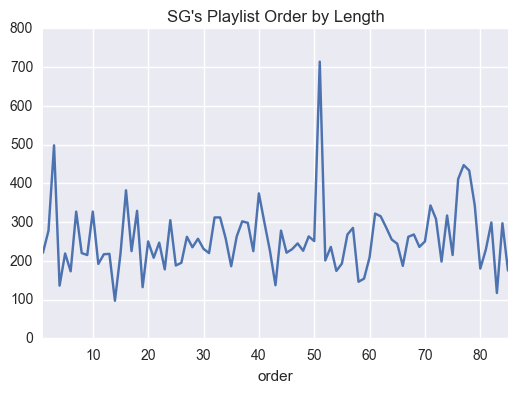

In [92]:
df_line = df[['order','length']]
df_line = df_line.set_index('order')
df_line.plot(title="SG's Playlist Order by Length",legend=None)

#for saving it later
#fig = purchase_plot.get_figure()
#fig.savefig("total-sales.png")

In [95]:
#plotly
# Create a trace
trace = go.Scatter(
    x = df['order'],
    y = df['length']
)

data = [trace]

iplot(data, filename='basic-line')

## Does `Energy` and `Dance` correlate in the playlist?

In [108]:
trace1 = go.Scatter(
    x = df['order'],
    y = df['energy'],
    mode = 'lines',
    name = 'Energy'
)
trace2 = go.Scatter(
    x = df['order'],
    y = df['dance'],
    mode = 'lines',
    name = 'Dance'
)
data = [trace1, trace2]


# Edit the layout
layout = dict(title = 'Relationship of Energy and Dance',
              xaxis = dict(title = 'Playlist Order'),
              yaxis = dict(title = 'Energy/Dance'),
              )

fig = dict(data=data, layout=layout)
iplot(fig, filename='playlist_dancing')